# **IMPORTACION DE LIBRERIAS**

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

%matplotlib inline

# **Carga de Datos**

In [55]:
ruta_carpeta = "app/tests/results/"

archivos = [os.path.join(ruta_carpeta, f) for f in os.listdir(ruta_carpeta) if os.path.isfile(os.path.join(ruta_carpeta, f))]

# Obtener el archivo con la fecha de creación más reciente
ultimo_archivo = max(archivos, key=os.path.getctime)

json_file = pd.read_json(ultimo_archivo)

print(json_file.head())

  tweet_id                                            content  inference_time  \
0        2  My heart aches watching families split apart b...        0.043614   
1        3  Every rumor of ballooning defense funds tighte...        0.030543   
2        4  Politicians clinking glasses over the election...        0.031354   
3        5  If this tax overhaul gets rubber‑stamped, stor...        0.034914   
4        6  Cross‑party hands just clasped on immigration ...        0.032103   

                                    emotion_analysis  
0  {'dominant_emotion': {'label': 'sadness', 'sco...  
1  {'dominant_emotion': {'label': 'fear', 'score'...  
2  {'dominant_emotion': {'label': 'fear', 'score'...  
3  {'dominant_emotion': {'label': 'fear', 'score'...  
4  {'dominant_emotion': {'label': 'surprise', 'sc...  


# **Analisis de tiempo de ejecución**

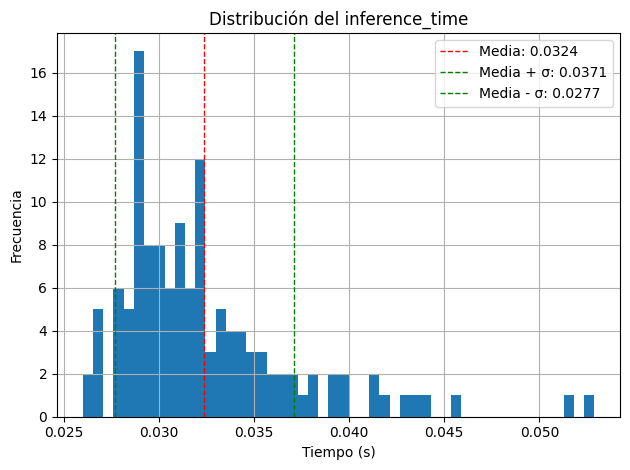

In [48]:
# Calcular estadísticas
media = json_file['inference_time'].mean()
desviacion = json_file['inference_time'].std()

# Histograma con líneas de media y desviación estándar
json_file['inference_time'].hist(bins=50)
plt.axvline(media, color='r', linestyle='dashed', linewidth=1, label=f'Media: {media:.4f}')
plt.axvline(media + desviacion, color='g', linestyle='dashed', linewidth=1, label=f'Media + σ: {(media + desviacion):.4f}')
plt.axvline(media - desviacion, color='g', linestyle='dashed', linewidth=1, label=f'Media - σ: {(media - desviacion):.4f}')

# Leyenda y mostrar
plt.legend()
plt.title("Distribución del inference_time")
plt.xlabel("Tiempo (s)")
plt.ylabel("Frecuencia")
plt.tight_layout()
plt.show()


Observamos que en la ejecución del análisis de emociones se demora en promedio 0.032 segundos por tweet, con una desviación estándar de 0.005 segundos.

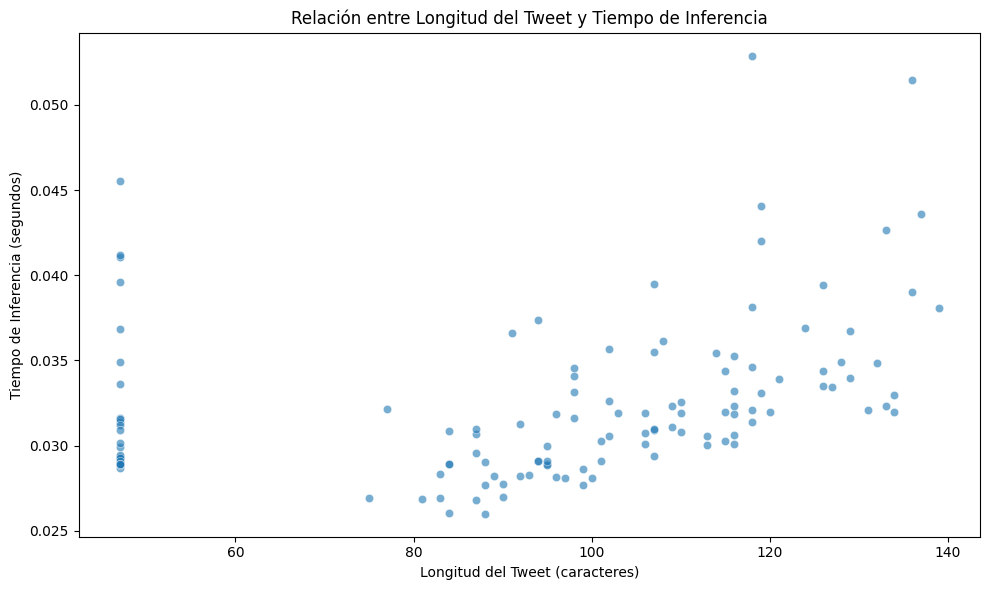

In [63]:
# Calcular longitud del tweet
json_file['tweet_length'] = json_file['content'].apply(len)

# Gráfico de dispersión
plt.figure(figsize=(10, 6))
sns.scatterplot(data=json_file, x='tweet_length', y='inference_time', alpha=0.6)
plt.title("Relación entre Longitud del Tweet y Tiempo de Inferencia")
plt.xlabel("Longitud del Tweet (caracteres)")
plt.ylabel("Tiempo de Inferencia (segundos)")
plt.tight_layout()
plt.show()

Observamos que existe una relacion lineal entre el tiempo de ejecución y la longitud del tweet.

# **Analisis de emociones**

## Emoción más predominante

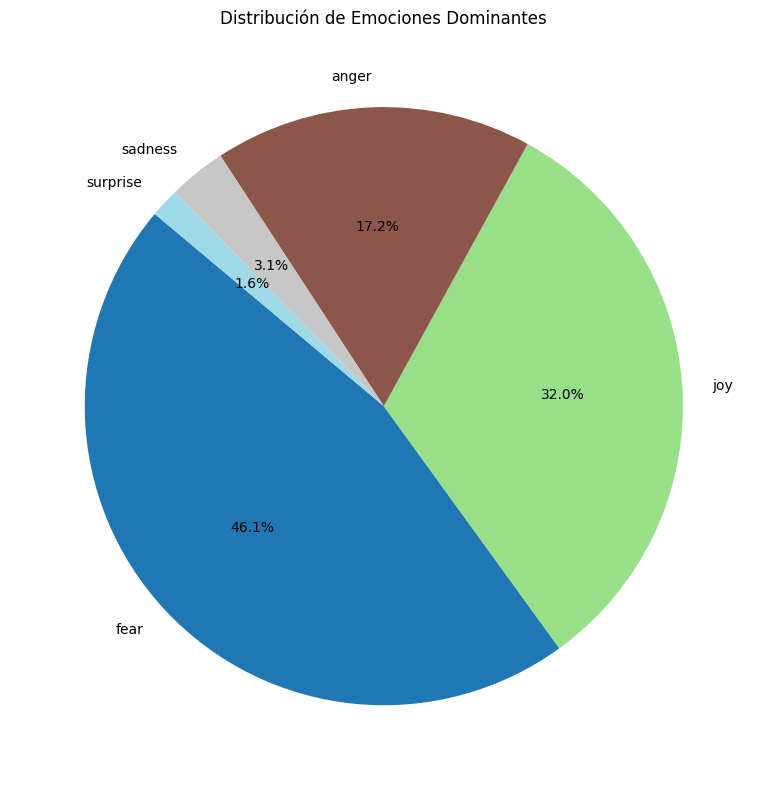

In [ ]:

# Extraer emociones dominantes
json_file['dominant_label'] = json_file['emotion_analysis'].apply(lambda x: x['dominant_emotion']['label'])
json_file['dominant_score'] = json_file['emotion_analysis'].apply(lambda x: x['dominant_emotion']['score'])


plt.figure(figsize=(8, 8))
json_file['dominant_label'].value_counts().plot.pie(autopct='%1.1f%%', startangle=140, cmap='tab20')
plt.title("Distribución de Emociones Dominantes")
plt.ylabel("")
plt.tight_layout()
plt.show()

Vemos que la emoción más predominante es la de fear con un 46.1%, seguida de joy con un 32%, anger con un 17.2%, sadness con un 3.1% y finalmente surprise con un 1.6%.

## Distribucion del Score de las Emociones

/tmp/ipykernel_11940/3954880764.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_emociones, x='label', y='score', palette='Set2')


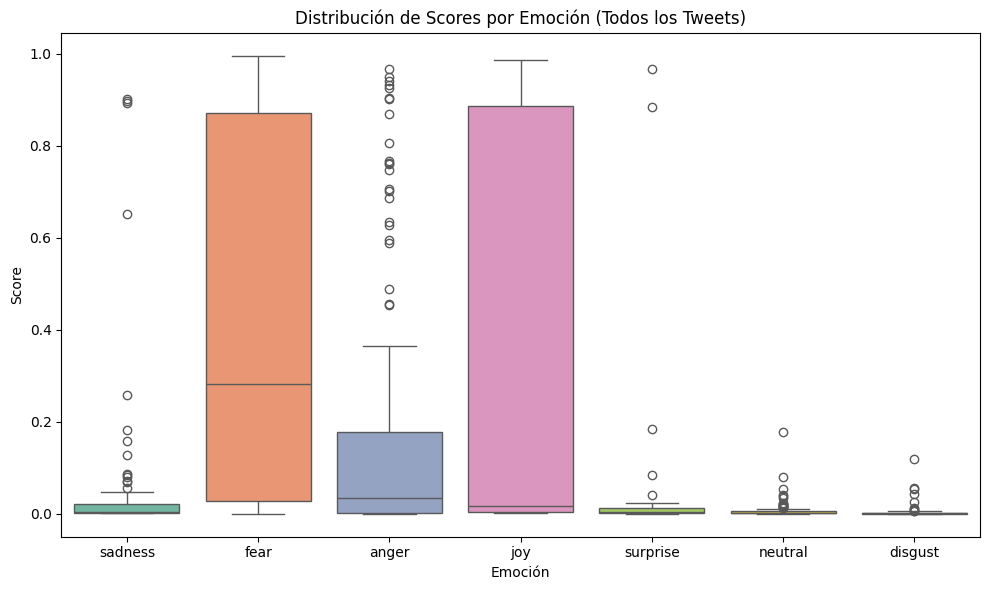

In [59]:
# Extraer todas las emociones de cada tweet en un DataFrame largo
all_emotions_data = []

for i, row in json_file.iterrows():
    tweet_id = row['tweet_id']
    for emotion in row['emotion_analysis']['all_emotions']:
        all_emotions_data.append({
            'tweet_id': tweet_id,
            'label': emotion['label'],
            'score': emotion['score']
        })

df_emociones = pd.DataFrame(all_emotions_data)

# --------- Gráfico de Violín (Score de todas las emociones) ---------
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_emociones, x='label', y='score', palette='Set2')
plt.title("Distribución de Scores por Emoción (Todos los Tweets)")
plt.xlabel("Emoción")
plt.ylabel("Score")
plt.tight_layout()
plt.show()


Vemos que la distribución del score de las emociones de sadness y surprise se alojan en una distribucion bimodal (o no esta presente el sentimiento o está muy presente). 

Tambien vemos que fear, anger y joy presentan una distribución por todo el rango de valores con una distribucion bimodal no tan presente. 

Y disgust y neutral presentan una distribución por un rango de valores pequeños con una distribucion normal.

## Análisis de Score con valores altos y bajos

/tmp/ipykernel_11940/266552048.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_mayores, x='label', y='score', palette='Set2', ax=axes[0])
/tmp/ipykernel_11940/266552048.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_menores, x='label', y='score', palette='Set3', ax=axes[1])


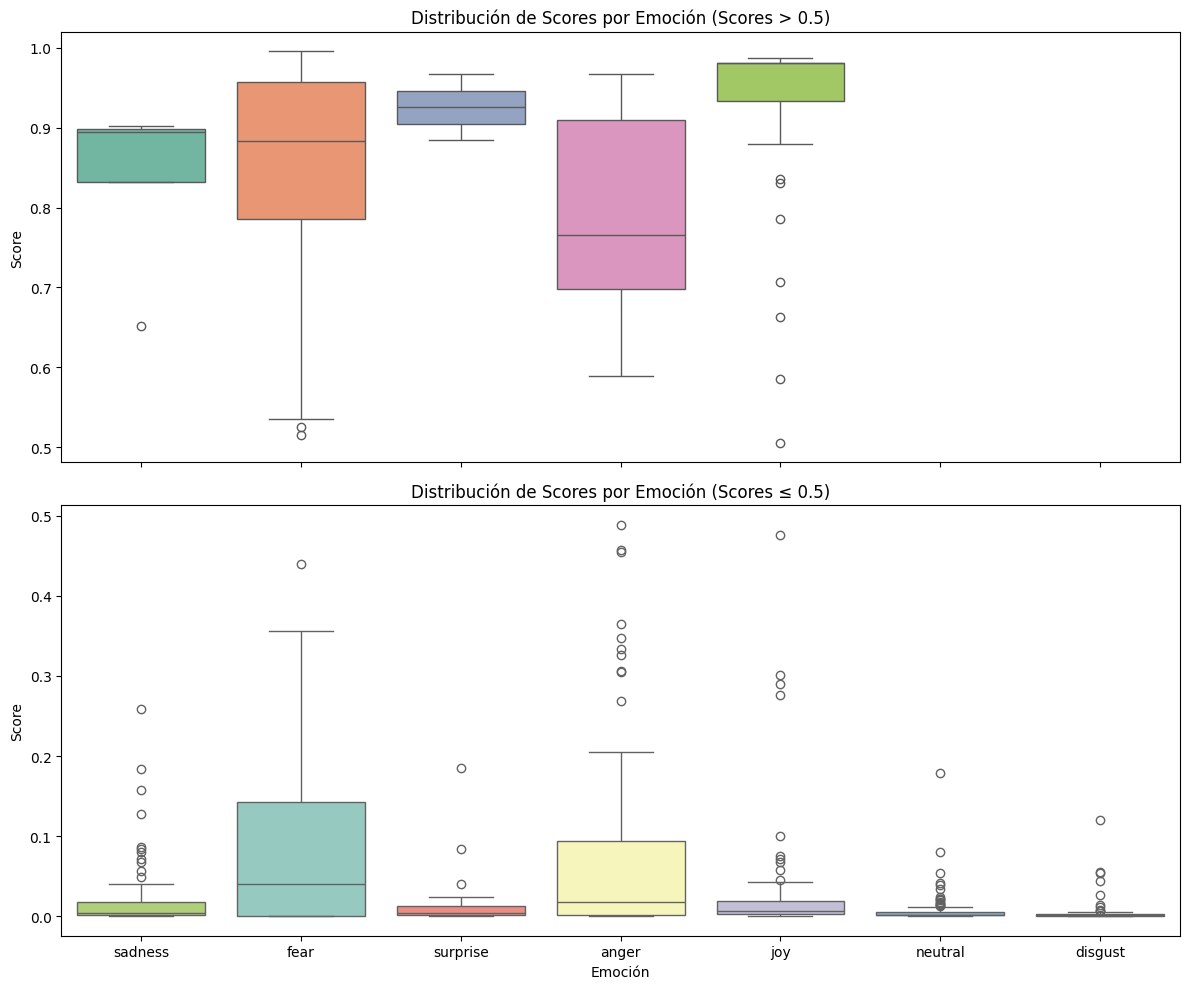

In [60]:
# Filtrar según el score
df_mayores = df_emociones[df_emociones['score'] > 0.5]
df_menores = df_emociones[df_emociones['score'] <= 0.5]

# Crear figura con dos subplots (uno arriba del otro)
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 10), sharex=True)

# Gráfico para scores > 0.5
sns.boxplot(data=df_mayores, x='label', y='score', palette='Set2', ax=axes[0])
axes[0].set_title("Distribución de Scores por Emoción (Scores > 0.5)")
axes[0].set_xlabel("")
axes[0].set_ylabel("Score")

# Gráfico para scores <= 0.5
sns.boxplot(data=df_menores, x='label', y='score', palette='Set3', ax=axes[1])
axes[1].set_title("Distribución de Scores por Emoción (Scores ≤ 0.5)")
axes[1].set_xlabel("Emoción")
axes[1].set_ylabel("Score")

plt.tight_layout()
plt.show()


Observamos de mejor manera la distribucion binomial de las emociones en cada tweet.

## Relacion entre los sentimientos y la longitud del tweet

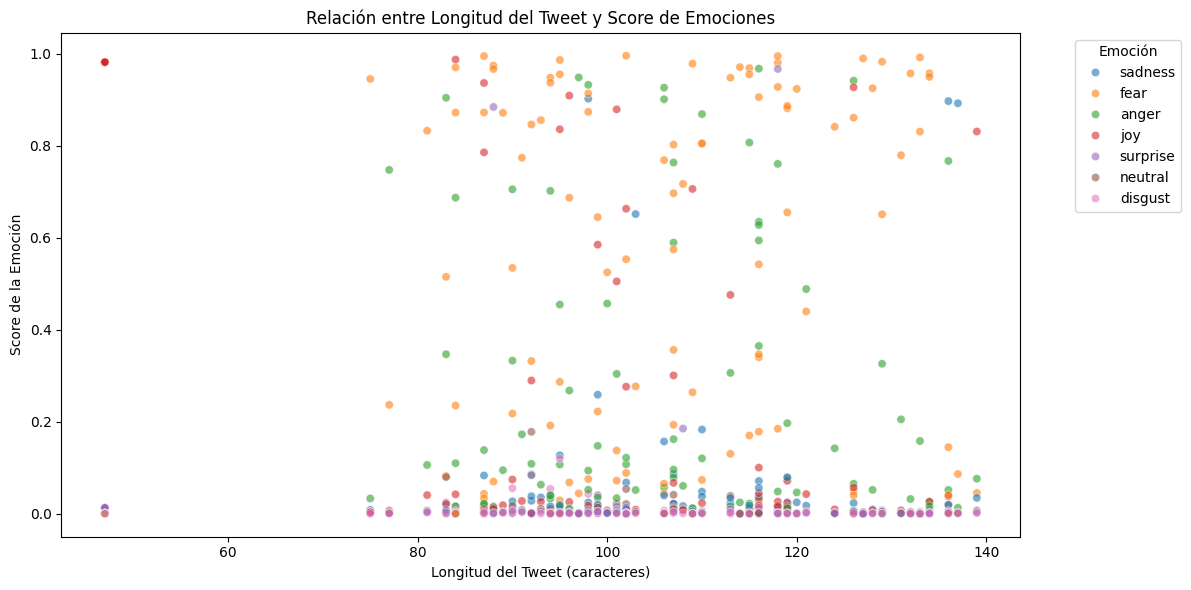

In [64]:
# Asociar longitud de tweet a cada emoción
all_emotions_data = []

for i, row in json_file.iterrows():
    tweet_id = row['tweet_id']
    tweet_length = row['tweet_length']
    for emotion in row['emotion_analysis']['all_emotions']:
        all_emotions_data.append({
            'tweet_id': tweet_id,
            'tweet_length': tweet_length,
            'label': emotion['label'],
            'score': emotion['score']
        })

df_emociones_con_longitud = pd.DataFrame(all_emotions_data)

# --------- Gráfico de puntos: relación entre emoción y longitud ---------
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_emociones_con_longitud, x='tweet_length', y='score', hue='label', alpha=0.6, palette='tab10')
plt.title("Relación entre Longitud del Tweet y Score de Emociones")
plt.xlabel("Longitud del Tweet (caracteres)")
plt.ylabel("Score de la Emoción")
plt.legend(title="Emoción", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


No se observan una relacion clara entre estas dos variables